# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Changing default pandas setting to custom
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)

# Loading Data

In [23]:
df = pd.read_csv("stircom.csv")
df.head()

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


In [24]:
df.shape

(50662, 20)

# Data Analysis

In [25]:
df.size

1013240

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

In [27]:
df.describe(include="all")

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
count,5.066200e+04,50662,50662,50662.000000,50662,50662,50662,50662,50662.000000,50662,50662,50662,50662.000000,50662.000000,50662,50662.000000,50662.000000,50662.000000,50662,50662
unique,NaN,101,5,NaN,12,3,4,2,NaN,2,3,4,NaN,NaN,13,NaN,NaN,NaN,4,2
top,NaN,London,UK,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,3241,50657,NaN,10849,30045,25779,49794,NaN,27250,42886,33595,NaN,NaN,14869,NaN,NaN,NaN,40614,40763
mean,5.502871e+07,NaN,NaN,40.979373,NaN,NaN,NaN,NaN,13.991210,NaN,NaN,NaN,3.005093,15.768525,NaN,2.713217,42.644408,0.640283,NaN,NaN
std,2.598596e+07,NaN,NaN,10.919324,NaN,NaN,NaN,NaN,30.899163,NaN,NaN,NaN,1.409003,8.347083,NaN,3.052227,102.238078,2.358029,NaN,NaN
min,1.000073e+07,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,-80.190000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,3.249964e+07,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.820000,NaN,NaN,NaN,2.000000,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,5.501127e+07,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,4.720000,NaN,NaN,NaN,3.000000,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,7.748809e+07,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,14.950000,NaN,NaN,NaN,4.000000,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [28]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

In [29]:
def make_plots_xy(x, y, title="", xlable="", ylable="", palette="Blues_d"):    
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.barplot(x, y, palette=palette)
    plt.title(title, fontsize=14)
    plt.xlabel(xlable, fontsize=12)
    plt.ylabel(ylable, fontsize=12)
    plt.xticks(rotation=65)
    
    plt.subplot(1,2,2)
    categories_num = len(x)
    plt.pie(x=y, autopct="%.1f%%", explode=[0.08]*categories_num, labels=x, pctdistance=0.5)
    plt.title(title, fontsize=14)
    plt.show()

Total unique values are:  5 


Category	Value

UK          50657
France          2
Portugal        1
USA             1
Germany         1
Name: country, dtype: int64


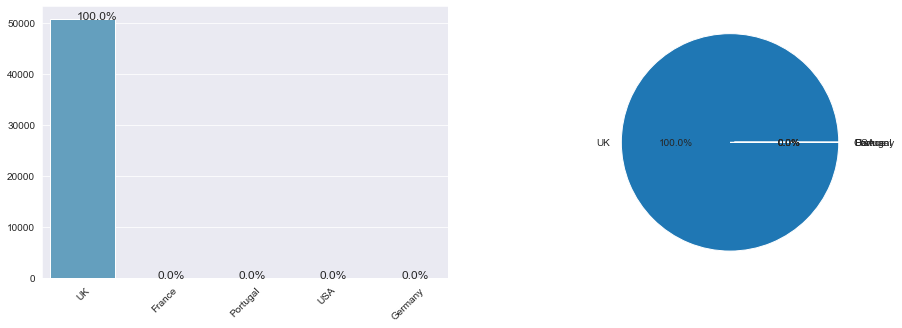

In [30]:
make_plots(df.country)

There are only five records for other countries. So, let's drop them and take the data for only UK.

In [17]:
df = df[df.country == "UK"]

In [43]:
# Percentage on bar
def per_on_bar(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

Total unique values are:  101 


Category	Value

London         3241
Birmingham     2383
Glasgow        1991
Bristol        1693
Liverpool      1591
Manchester     1244
Basingstoke     468
Darlington      467
Maidstone       452
County Down     439
Northampton     435
Dundee          433
Southampton     433
Swindon         433
Cardiff         433
Raleigh         432
Stockport       431
Colchester      431
Ipswich         430
Doncaster       426
Name: town, dtype: int64


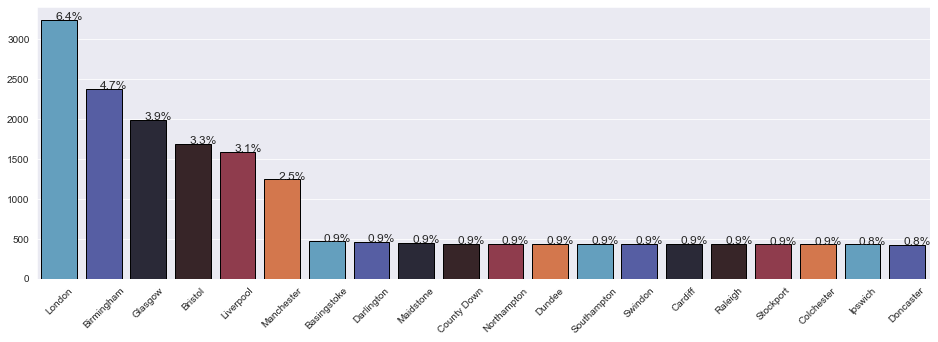

In [48]:
per_on_bar(df.town, limited=True, n=20)

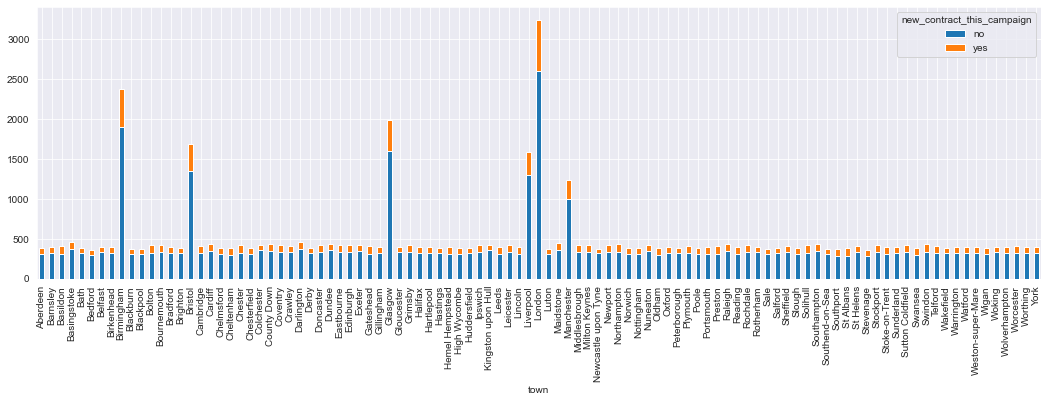

In [37]:
pd.crosstab(df.town, df.new_contract_this_campaign).plot(kind="bar", figsize=(18, 5), stacked=True)
plt.show()

From this graph we can see that in following towns the number of compaigns are high.
- Briminghim
- Bristol
- Glasgow
- London
- Livepool
- Manchester

Except these towns the compaigns are equal in all other towns.

The ratio of Success compaign is 0.19539299672338242
Total unique values are:  2 


Category	Value

no     40763
yes     9899
Name: new_contract_this_campaign, dtype: int64


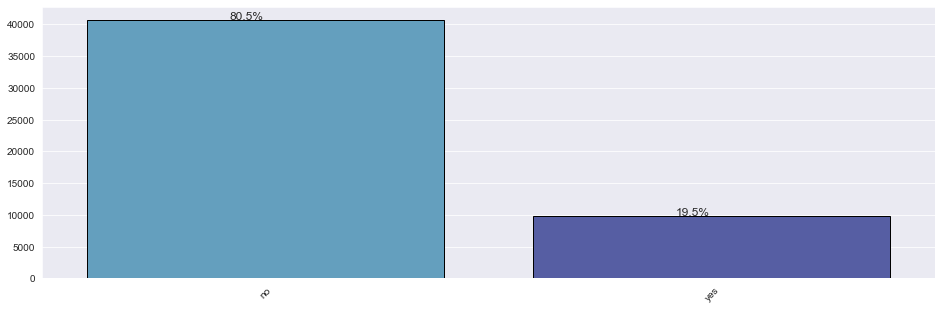

In [45]:
# Ratio of compaign success
ratio = df.new_contract_this_campaign.value_counts()["yes"]/df.shape[0]
print(f"The ratio of Success compaign is {ratio}")

per_on_bar(df.new_contract_this_campaign)

The Success ratio of compaign is 0.19539299672338242. And from the above graph we can also see that out target feature is imbalance. So, the whole data is imbalance.

<AxesSubplot:xlabel='age', ylabel='age'>

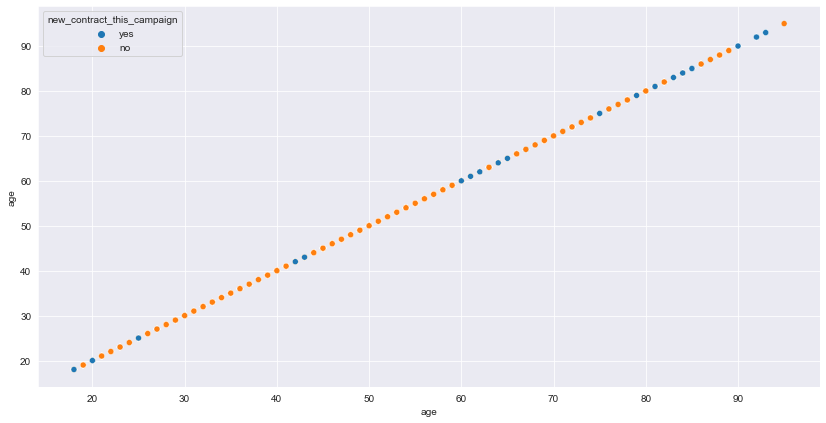

In [49]:
sns.scatterplot(df.age, df.age, hue=df.new_contract_this_campaign)

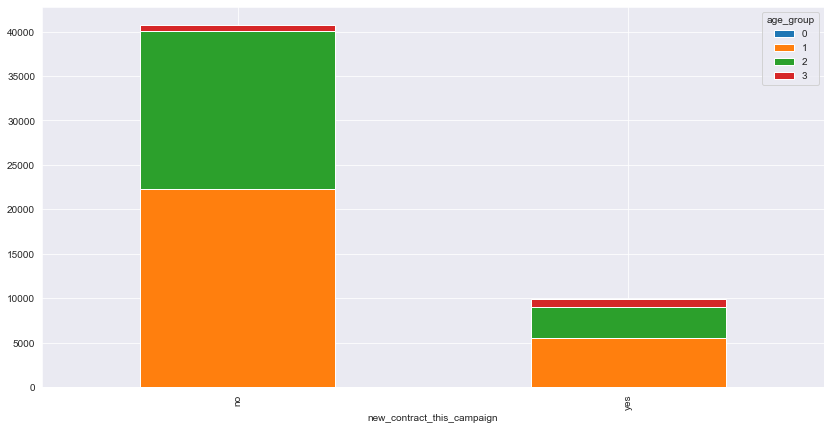

In [65]:
df["age_group"] = pd.cut(df.age, bins=[0, 20, 40, 60, 100], labels=[0, 1, 2, 3])
pd.crosstab(df.new_contract_this_campaign, df.age_group).plot(kind='bar', stacked=True)
plt.show()

From this graph we can see the age group 2 is mostly targeted that is from 40 to 60.

<AxesSubplot:xlabel='job'>

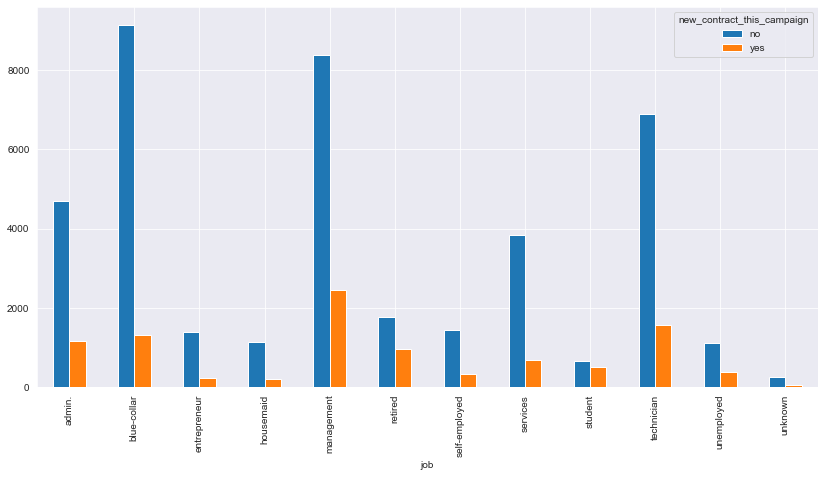

In [67]:
pd.crosstab(df.job, df.new_contract_this_campaign).plot(kind="bar")
plt.show()

Compaign acceptance ratio is high in people having Job **Management & Student**

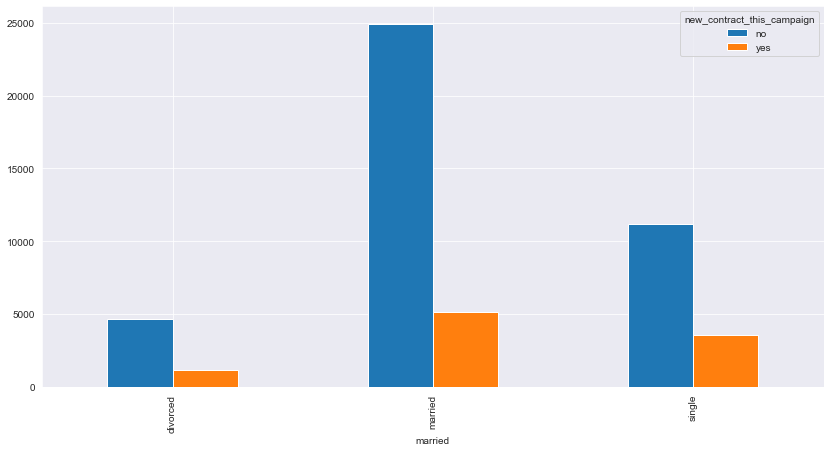

In [68]:
pd.crosstab(df.married, df.new_contract_this_campaign).plot(kind="bar")
plt.show()

Compaign accpetance ratio is high among Single persons.

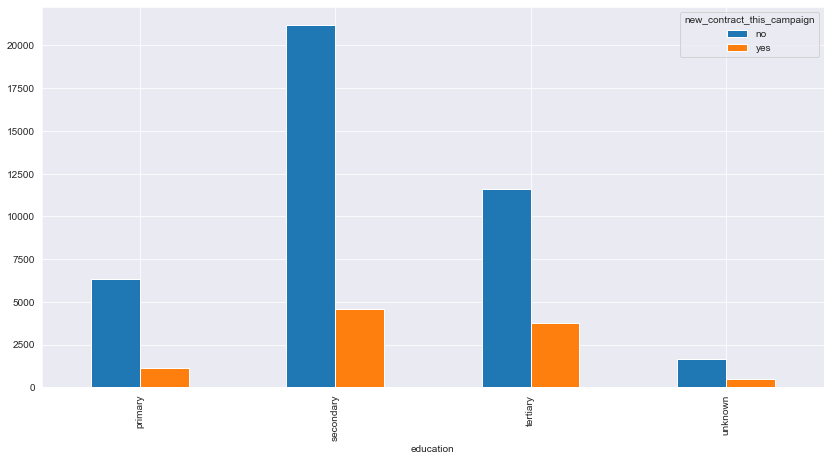

In [69]:
pd.crosstab(df.education, df.new_contract_this_campaign).plot(kind="bar")
plt.show()

Compaign accpetance ratio is high among Teritary educated persons.

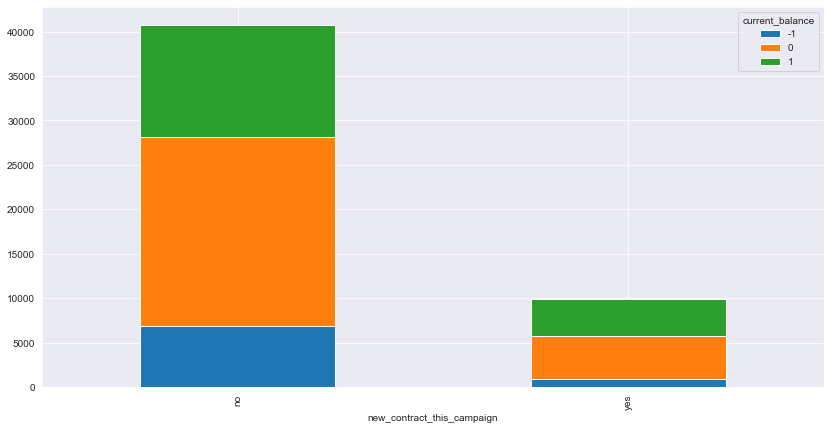

In [82]:
temp = pd.cut(df.current_balance, bins=[-1000, 0, 10, 1000], labels=[-1, 0, 1])
pd.crosstab(df.new_contract_this_campaign, temp).plot(kind="bar", stacked=True)
plt.show()

In [85]:
px.histogram(x=df.housing, color=df.new_contract_this_campaign)

Peoples who don't have House accepted more compaigns

# Data Preparation

In [88]:
df.isnull().sum()

ID                                           0
town                                         0
country                                      0
age                                          0
job                                          0
married                                      0
education                                    0
arrears                                      0
current_balance                              0
housing                                      0
has_tv_package                               0
last_contact                                 0
conn_tr                                      0
last_contact_this_campaign_day               0
last_contact_this_campaign_month             0
this_campaign                                0
days_since_last_contact_previous_campaign    0
contacted_during_previous_campaign           0
outcome_previous_campaign                    0
new_contract_this_campaign                   0
age_group                                    0
dtype: int64

In [90]:
df[df.duplicated()]

,ID,town,country,age,job,married,education,arrears,current_balance,housing,...,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign,age_group


In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in df.select_dtypes("O"):
    df[i] = encoder.fit_transform(df[i])

In [103]:
X = df.drop(["ID", "age_group", "new_contract_this_campaign"], axis=1)
y = df.new_contract_this_campaign

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [105]:
# Balancing data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)

# Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
params = {
    "tol": [0.0001, 0.001, 0.1, 1],
    "C": [0.1, 1, 10, 15],
    "fit_intercept": [True, False]
}

grid_lg = GridSearchCV(LogisticRegression(), params, n_jobs=-1)
grid_lg.fit(X_train, y_train)
grid_lg.best_params_

{'C': 1, 'fit_intercept': False, 'tol': 0.0001}

In [112]:
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 6, 9],
    "min_samples_split": [2, 3, 6],
    "min_samples_leaf": [1, 3, 5]
}

grid_lg = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1)
grid_lg.fit(X_train, y_train)
grid_lg.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# Building Model

+ ==================================================================================================== +
			1-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.672346864925324
--------------------------------------------------
F1 :  [0.77281022 0.41259731]
--------------------------------------------------
Reacll :  [0.68544145 0.61541168]
--------------------------------------------------
Precision :  [0.88570532 0.31032647]
--------------------------------------------------
Confusion Matrix....
 [[8470 3887]
 [1093 1749]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.89      0.69      0.77     12357
           1       0.31      0.62      0.41      2842

    accuracy                           0.67     15199
   macro avg       0.60      0.65      0.59     15199


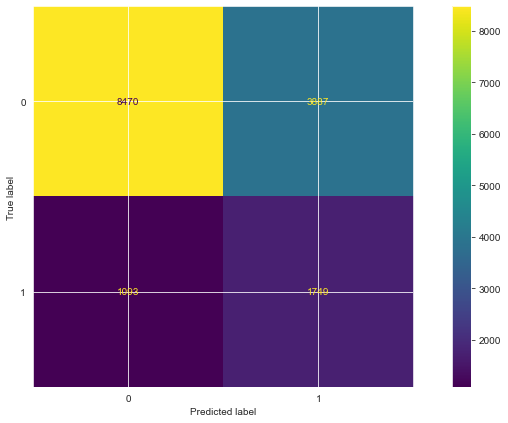

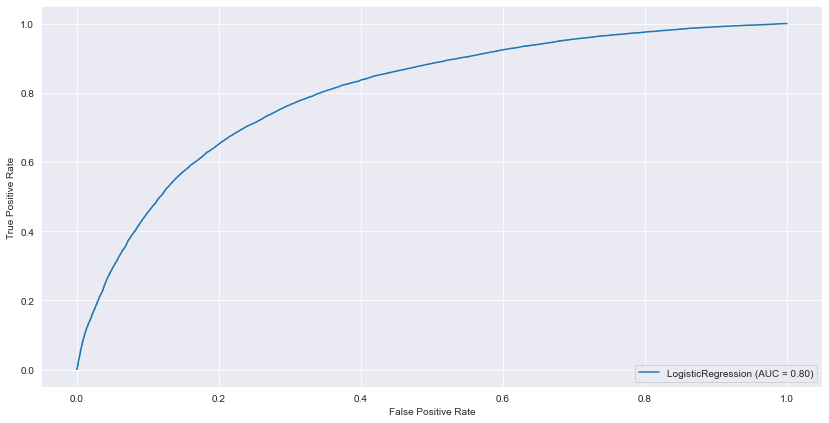

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 1.325 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8130140140798737
--------------------------------------------------
F1 :  [0.89686457 0.        ]
--------------------------------------------------
Reacll :  [1. 0.]
--------------------------------------------------
Precision :  [0.81301401 0.        ]
--------------------------------------------------
Confusion Matrix....
 [[12357     0]
 [ 2842     0]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.8

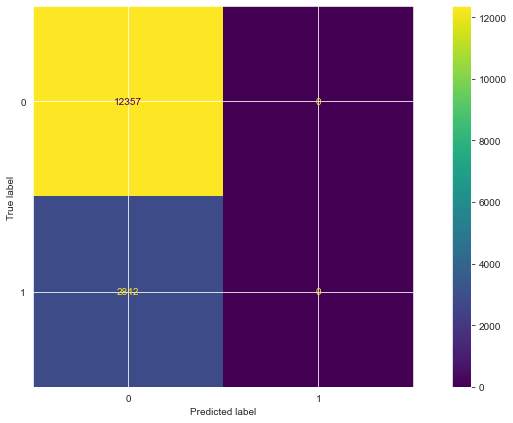

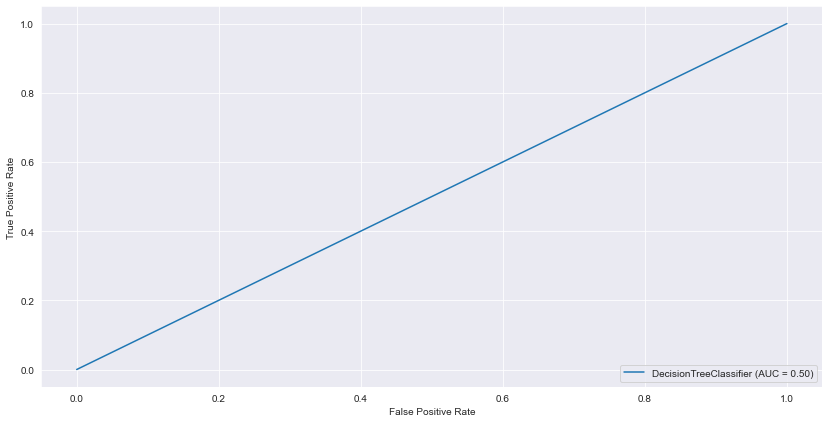

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 0.489 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For MLPClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7299822356733996
--------------------------------------------------
F1 :  [0.82222992 0.43873085]
--------------------------------------------------
Reacll :  [0.76806668 0.56439127]
--------------------------------------------------
Precision :  [0.8846118  0.35883669]
--------------------------------------------------
Confusion Matrix....
 [[9491 2866]
 [1238 1604]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0   

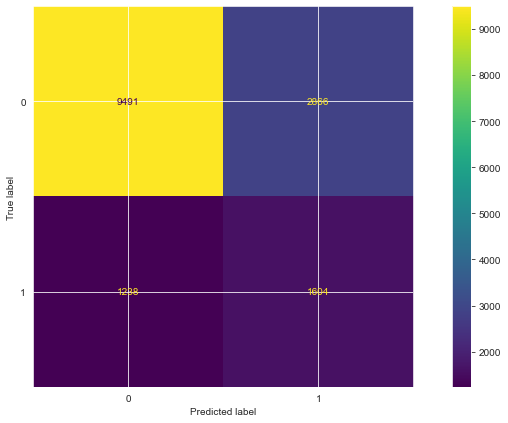

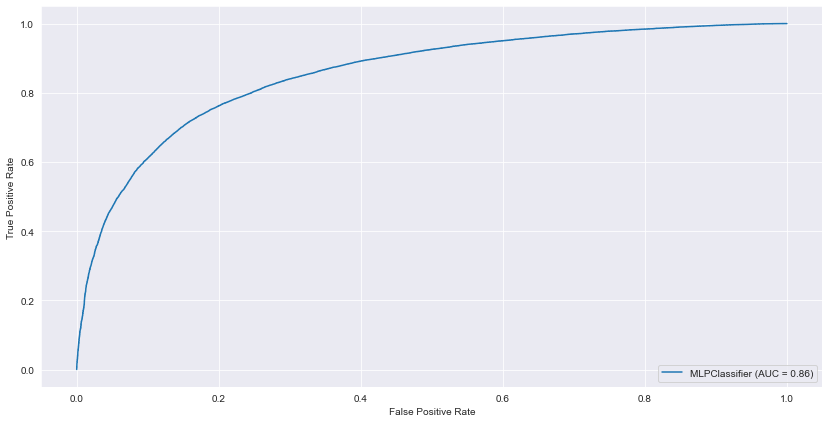

							-----------------------------------------------------------
							 Time for detection (MLPClassifier) : 60.458 seconds...
							-----------------------------------------------------------



In [114]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, plot_roc_curve, classification_report, plot_confusion_matrix

# check the performance on diffrent regressor
models = []
models.append(('LogisitcRegression', LogisticRegression(C=1, tol=0.0001, fit_intercept=False)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion="entropy", max_depth=None, min_impurity_split=2, min_samples_leaf=1)))
models.append(('MLPClassifier', MLPClassifier()))


# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    plot_roc_curve(clf, X_train, y_train)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [115]:
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})

,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,LogisitcRegression,0.672347,"[0.8857053225975112, 0.3103264726756565]","[0.6854414501901757, 0.615411681914145]","[0.7728102189781022, 0.41259731068648264]","[[8470, 3887], [1093, 1749]]"
1,DecisionTreeClassifier,0.813014,"[0.8130140140798737, 0.0]","[1.0, 0.0]","[0.8968645667005372, 0.0]","[[12357, 0], [2842, 0]]"
2,MLPClassifier,0.729982,"[0.8846117997949483, 0.35883668903803134]","[0.7680666828518249, 0.5643912737508796]","[0.8222299228969938, 0.4387308533916849]","[[9491, 2866], [1238, 1604]]"
